# United States Presidential Inaugural Speeches, 1789-2009
NTLK Corpus analysis and visualizations 

#### UCSD Python for Data Science - Week 9 Project

#####  	US presidential inaugural addresses 1789-2009 

**Using NTLK and Python to analyse and visualize the NLTK corpus of the US Presidents inaugural speeches from George Washington to Barak Obama.** The officila name of the Corpus is "C-Span Inaugural Address Corpus".  A little more information on it is available at; http://search.language-archives.org/record.html?id=languagecommons_org_Inaugural-Address-Corpus-1789-2009

![Presidential Seal](./img/US_PresidentialSeal.JPG)

**Project Outline**
* Install NLTK (Natural Language Tool Kit) and the required moduals (http://www.nltk.org/)
* Review the contents of the Inaugural Corpus
* Determine most used words
* Visualize most used words using "Word Cloud"
* Further visualization using a "mask" to shape the word cloud.

In [1]:
# import the natural launguage tool kit 
import nltk

In [2]:
# download the require NLTK objets
# nltk.download('inaugural')
# nltk.download('gutenberg')
# nltk.download('genesis')
# nltk.download('nps_chat')
# nltk.download('webtext')
# nltk.download('treebank')
# nltk.download("punkt")
# nltk.download("stopwords")

In [3]:
# import these for direct use, some require the above to be downloaded
from nltk.corpus import inaugural
from nltk.corpus import gutenberg
from nltk.corpus import genesis

**Review the contents of the Inaugural Corpus**

In [4]:
len(inaugural.fileids())

56

In [5]:
# head of list of text files in the corpus
inaugural.fileids()[:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [6]:
# tail of list of text files in the corpus
inaugural.fileids()[51:56]

['1993-Clinton.txt',
 '1997-Clinton.txt',
 '2001-Bush.txt',
 '2005-Bush.txt',
 '2009-Obama.txt']

In [7]:
# Search and display  words ('vote') in context accross text 
from nltk.book import text4
text4.concordance("vote")

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
Displaying 8 of 8 matches:
determined by a majority of a single vote , and that can be procured by a part
e is applied it may be overcome by a vote of two - thirds of both Houses of Co
ent expression of his opinion by his vote . This sacred right of each individu
of uneducated negroes are allowed to vote . These are grave allegations . So f
ess and the canvass of the electoral vote . Our people have already worthily o
 to effect a change in the electoral vote of the Southern State

In [8]:
# Find words that appear in similar contexts
text4.similar("people")

government nation world country union constitution states time land
republic executive future law strength citizens power way laws spirit
nations


In [9]:
# common 2 word combinations
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [10]:
# number of words in the corpus
len(text4)

145735

## Plotting Frequencies of Words


## Review NLTK bag of words for this corpus

NLTK provides a "bag-of-words" (an object containing the cleaned and prepared list the words for all text files in the corpus).

We'll use that to find the most frequently used words.

In [11]:
all_words = inaugural.words()
len(all_words)

145735

In [12]:
type(all_words)

nltk.corpus.reader.util.ConcatenatedCorpusView

**Remove "junk" words, also called "stopwords"**
NLTK also provides a list of these common words.  We remove them to get a better list of the most used, meaningfull words.

In [13]:
# string of punctuation that can be used to remove them from the text
import string

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
#useless_words
#type(useless_words)

In [16]:
filtered_words = [word for word in inaugural.words() if not word in useless_words]
type(filtered_words)

list

**Determine most used words**

In [17]:
# import and use the NLTK counter function
from collections import Counter
word_counter = Counter(filtered_words)

In [18]:
# store the top 50 most common words
most_common_words = word_counter.most_common(50)
# look at the top 15 of those
most_common_words[0:15]

[('I', 831),
 ('The', 619),
 ('people', 559),
 ('We', 483),
 ('us', 455),
 ('--', 363),
 ('upon', 363),
 ('It', 356),
 ('must', 345),
 ('Government', 331),
 ('States', 325),
 ('may', 316),
 ('great', 312),
 ('world', 312),
 ('shall', 310)]

In [19]:
# import the plotting tool
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

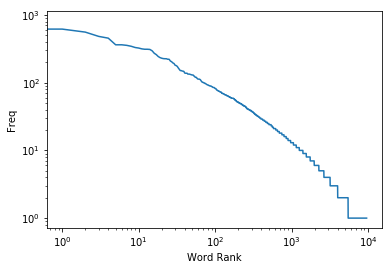

In [20]:
# plot all words sorted in decending order by count
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

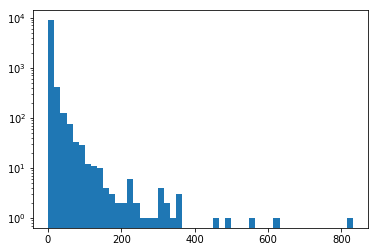

In [21]:
# a histogram of the same words, not the bin size to help visualize the data better
plt.hist(sorted_word_counts, bins=50, log=True);

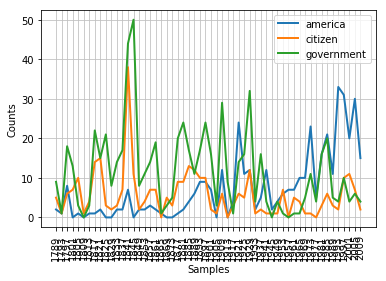

In [22]:
# another useful NLTK functin to view select word usage over time
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['government','america', 'citizen']
           if w.lower().startswith(target))
cfd.plot()

**Visualize most used words using "Word Cloud"**

In [23]:
# turn the common word list into a string for the word cloud plot
word_string = ' '
for x in most_common_words:
    word_string = word_string + x[0] + ' '
print(word_string)

 I The people We us -- upon It must Government States may great world shall country every government peace nation citizens new one power In public would time Constitution America nations free freedom United war made Our But And American men good Union spirit years national law life rights make 


In [24]:
# install these if needed
# !python -m pip install matplotlib
# !python -m pip install pandas
# !python -m pip install wordcloud

In [25]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

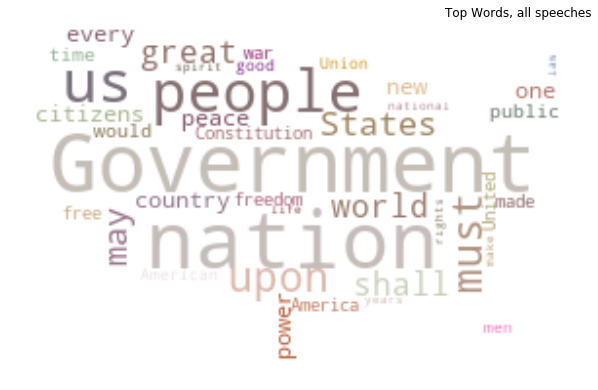

In [26]:
# Generate a word cloud image
mask = np.array(Image.open("img/usa_map_mask_1.jpg"))
wordcloud_all = WordCloud(stopwords=useless_words, background_color="white", max_words=1000, mask=mask).generate(word_string)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.title('Top Words, all speeches', loc='right')
plt.imshow(wordcloud_all.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.show()

**Further visualization using a "mask" to shape the word cloud.**

**Wordcloud - George Washingtons first inaugural address.**

In [27]:
george = nltk.corpus.inaugural.raw('1789-Washington.txt')

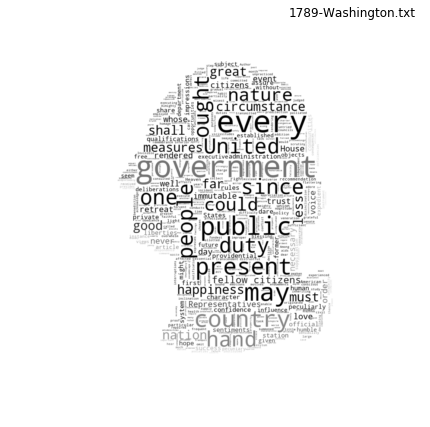

In [28]:
# Generate a word cloud image
mask = np.array(Image.open("img/george_silhouette_1.jpg"))
wordcloud_george = WordCloud(stopwords=useless_words, background_color="white", max_words=1000, mask=mask).generate(george)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.title('1789-Washington.txt', loc='right')
plt.imshow(wordcloud_george.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/por_wine.png", format="png")
plt.show()

**Wordcloud - Barrak Obama's first inaugural address.**

In [29]:
obama = nltk.corpus.inaugural.raw('2009-Obama.txt')

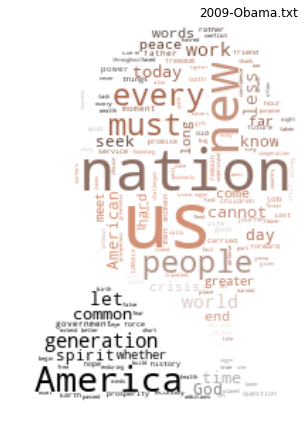

In [30]:
# Generate a word cloud image
#mask = np.array(Image.open("img/obama.jpg"))
mask = np.array(Image.open("img/obama_4.jpg"))
wordcloud_barrak = WordCloud(stopwords=useless_words, background_color="white", max_words=1000, mask=mask).generate(obama)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.title('2009-Obama.txt', loc='right')
plt.imshow(wordcloud_barrak.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/por_wine.png", format="png")
plt.show()

#### Conclusion
This project was exploratory in nature to take a "first look" at using the Natural Language Tool Kit (NLTK) for analysis of large sets of unstructured data.

This notebook uses a small set of this took kit and has shown that it's a useful tool for exploration and analysis of unstructured data.
